In [1]:
from dataclasses import dataclass
import enum
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize
import pandas as pd
from IPython.display import Markdown
import itertools
from matplotlib import gridspec, pyplot as plt
from sklearn.metrics import auc, roc_auc_score, roc_curve
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from db import Database, get_df

import common

%matplotlib inline
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('svg')


pd.set_option('display.max_rows', None)


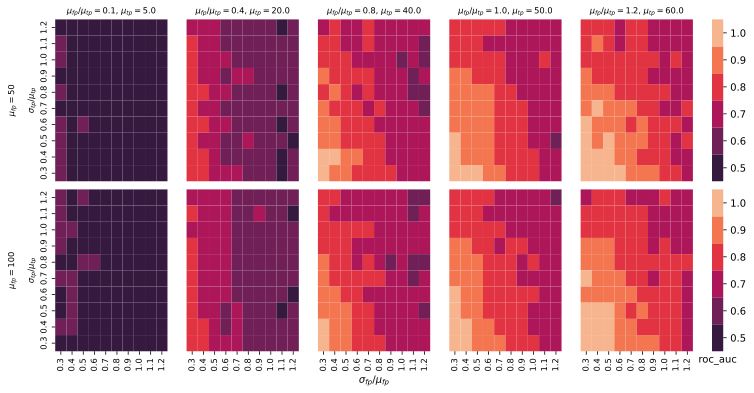

In [2]:

sigma_fp_ratios=list(map(lambda x: x*1.0/10.0+0.2, range(1, 11, 1)))
sigma_tp_ratios=list(map(lambda x: x*1.0/10.0+0.2, range(1, 11, 1)))

fig = plt.figure(figsize=(12,6))
for k, mu_fp in enumerate([50, 100]):
    gs = fig.add_gridspec(2, 6, width_ratios=[1, 1, 1, 1, 1, 0.1], hspace=0.05)  # 4 quadranti per le heatmap, 1 per la colormap

    for i, mu_tp_ratio in enumerate([0.1, 0.4, 0.8, 1.0, 1.2]):
        if i == 0:
            ax = fig.add_subplot(gs[k, i])
        else:
            ax = fig.add_subplot(gs[k, i])#, sharey=ax0)

        df = common.simulate_loop(1, mu_fp, mu_tp_ratio, sigma_fp_ratios, sigma_tp_ratios, common.SimulateMode.NORMAL).round(4).sort_index()

        df = df.pivot(columns='sigma_fp_ratio', index='sigma_tp_ratio', values='roc_auc')

        if i == 4:
            cbar_ax = fig.add_subplot(gs[k, 5])
        else:
            cbar_ax = ax

        ax = sns.heatmap(df.sort_index(ascending=False), ax=ax, cbar=i==4, cbar_ax=cbar_ax, vmin=0.5, vmax=1.0, cmap=sns.color_palette("rocket", n_colors=6)) # type: ignore
        if k == 0:
            ax.set_xticks([])
        if i > 0:
            ax.set_ylabel('')
            # ax.set_yticks([x/10 + 0.5 for x in range(10)],
            # np.linspace(0,1,10))
            ax.set_yticks([])
            pass
        else:
            ax0 = ax
            pass
        if k == 0 or i != 2:
            ax.set_xlabel('')
        else:
            ax.set_xlabel('$\\sigma_{fp}/\\mu_{fp}$')
        # if i == 2:
        #     ax.set_title(f'mu_fp={mu_fp}', size='small')
        if i == 0:
            ax.set_ylabel(f'$\\mu_{{fp}}={mu_fp}$\n\n$\\sigma_{{tp}}/\\mu_{{tp}}$', size='small')

        if k == 0:
            ax.set_title(f'$\\mu_{{fp}}/\\mu_{{tp}}={mu_tp_ratio}$, $\\mu_{{tp}}={mu_tp_ratio * mu_fp}$', size='small')
        ax.tick_params(labelsize='small')
        pass

    if k == 1:
        cbar_ax.set_xlabel('roc_auc')
        pass
    cbar_ax.set_yticks([ x*0.5/6 + 0.5 + 0.5/12 for x in range(6)], '0.5,0.6,0.7,0.8,0.9,1.0'.split(','))
    pass

